In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
gold = pd.read_csv("https://raw.githubusercontent.com/labs13-quake-viewer/ds-data/master/Gold%201968-present%20(cleaned).csv")
gold.shape

(13350, 2)

In [3]:
gold.describe()

,closing_price
count,13350.000000
mean,526.193945
std,434.811115
min,34.750000
25%,276.300000
50%,379.850000
75%,643.687500
max,1895.000000


In [4]:
(gold == 0).sum()

observation_date    0
closing_price       0
dtype: int64

In [3]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13350 entries, 0 to 13349
Data columns (total 2 columns):
observation_date    13350 non-null object
closing_price       13350 non-null float64
dtypes: float64(1), object(1)
memory usage: 208.7+ KB


In [0]:
gold.head(12)

,observation_date,closing_price
0,1968-04-01,37.70
1,1968-04-02,37.30
2,1968-04-03,37.60
3,1968-04-04,36.95
4,1968-04-05,37.00
5,1968-04-08,37.05
6,1968-04-09,37.50
7,1968-04-10,37.70
8,1968-04-11,38.00
9,1968-04-12,38.00


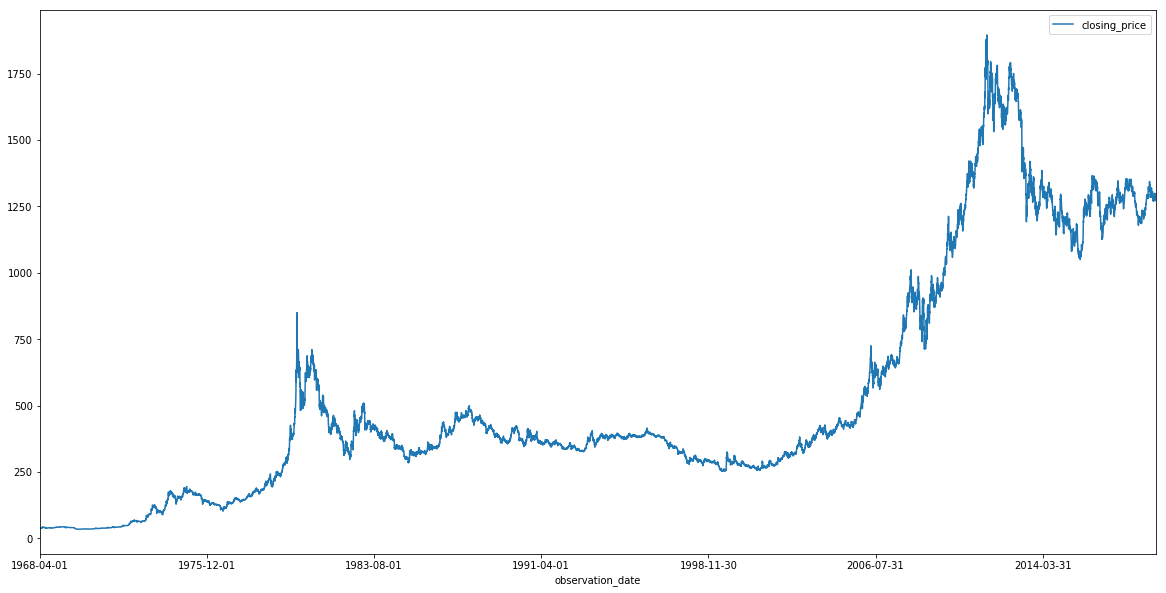

In [0]:
gold.plot(x="observation_date", y="closing_price", figsize=(20, 10));

In [4]:
df_gold = gold.set_index('observation_date')
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13350 entries, 1968-04-01 to 2019-05-31
Data columns (total 1 columns):
closing_price    13350 non-null float64
dtypes: float64(1)
memory usage: 208.6+ KB


In [18]:
df_gold.head(6)

,closing_price
observation_date,
1968-04-01,37.70
1968-04-02,37.30
1968-04-03,37.60
1968-04-04,36.95
1968-04-05,37.00
1968-04-08,37.05


In [5]:
quakes = pd.read_csv("https://raw.githubusercontent.com/labs13-quake-viewer/ds-data/master/Earthquakes%205.5%201900-present.csv")
quakes.shape

(30251, 22)

In [7]:
quakes.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,30251.000000,30251.000000,29997.000000,30251.000000,7109.000000,8354.000000,2672.000000,18486.000000,2234.000000,5610.000000,1369.000000,3611.000000
mean,4.282117,37.327246,64.094516,5.951607,273.044732,44.853689,4.189849,1.018730,7.666862,5.078937,0.061660,47.232069
std,30.930651,125.660867,115.575820,0.471951,162.453989,35.404920,5.449785,0.360655,8.588187,20.749316,0.031673,62.862633
min,-77.080000,-179.997000,-4.000000,5.500000,0.000000,0.000000,0.004505,0.000000,0.085000,0.000000,0.000000,0.000000
25%,-17.616000,-79.147000,15.000000,5.600000,144.000000,24.000000,1.142500,0.900000,5.600000,1.800000,0.047000,14.000000
50%,-0.856000,100.063000,33.000000,5.800000,252.000000,35.900000,2.489500,1.000000,7.000000,3.100000,0.057000,30.000000
75%,32.038000,144.442000,47.000000,6.200000,381.000000,54.200000,4.895000,1.120000,8.300000,5.400000,0.068000,57.500000
max,86.922900,180.000000,700.000000,9.500000,934.000000,360.000000,37.874000,42.410000,99.000000,1312.300000,0.410000,941.000000


In [6]:
quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30251 entries, 0 to 30250
Data columns (total 22 columns):
time               30251 non-null object
latitude           30251 non-null float64
longitude          30251 non-null float64
depth              29997 non-null float64
mag                30251 non-null float64
magType            30251 non-null object
nst                7109 non-null float64
gap                8354 non-null float64
dmin               2672 non-null float64
rms                18486 non-null float64
net                30251 non-null object
id                 30251 non-null object
updated            30251 non-null object
place              30248 non-null object
type               30251 non-null object
horizontalError    2234 non-null float64
depthError         5610 non-null float64
magError           1369 non-null float64
magNst             3611 non-null float64
status             30251 non-null object
locationSource     30251 non-null object
magSource          30251 

In [9]:
quakes.sample(12)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
364,2018-09-03T20:35:50.170Z,-58.0118,-25.2632,29.37,5.6,mww,NaN,32.0,7.296,0.98,us,us2000h7aj,2018-11-14T17:40:12.040Z,"135km NNE of Bristol Island, South Sandwich Is...",earthquake,10.2,3.5,0.069,20.0,reviewed,us,us
23823,1967-03-02T02:47:33.000Z,-0.2140,-78.5950,118.90,6.0,mw,NaN,NaN,NaN,NaN,iscgem,iscgem837313,2015-05-13T18:53:00.000Z,Ecuador,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
8423,2002-11-20T21:32:30.810Z,35.4140,74.5150,33.00,6.3,mwc,400.0,NaN,NaN,1.00,us,usp000bj2e,2017-04-26T18:00:55.218Z,northwestern Kashmir,earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
19832,1977-12-15T23:20:53.600Z,-4.7610,34.9130,33.00,5.6,ms,NaN,NaN,NaN,NaN,us,usp0000s3b,2016-11-10T00:12:36.626Z,Tanzania,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
26597,1957-08-11T21:38:10.000Z,-17.8310,169.2260,20.00,6.1,mw,NaN,NaN,NaN,NaN,iscgem,iscgem887008,2015-05-13T18:52:52.000Z,Vanuatu,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
22254,1972-01-02T21:57:01.000Z,15.9780,-98.3350,15.00,5.8,mw,NaN,NaN,NaN,NaN,iscgem,iscgem776638,2015-05-13T18:53:06.000Z,"offshore Oaxaca, Mexico",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
25589,1960-12-14T00:57:25.000Z,-10.9480,165.5190,25.00,6.0,mw,NaN,NaN,NaN,NaN,iscgem,iscgem880988,2015-05-13T18:52:55.000Z,Santa Cruz Islands,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
3769,2011-04-11T22:26:20.030Z,36.8090,138.2840,17.10,5.5,mwc,238.0,34.9,NaN,0.96,us,usp000hzsf,2017-04-26T18:12:11.840Z,"eastern Honshu, Japan",earthquake,NaN,5.9,NaN,NaN,reviewed,us,gcmt
14532,1990-04-19T01:05:08.760Z,1.3000,123.0210,33.00,6.0,mw,NaN,NaN,NaN,1.30,us,usp0004850,2016-11-09T22:20:21.745Z,"Minahasa, Sulawesi, Indonesia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
5667,2008-01-07T08:14:20.360Z,51.1980,-179.6000,35.00,5.6,mwc,369.0,69.0,NaN,0.87,us,usp000fw5x,2019-02-13T08:03:13.907Z,"Andreanof Islands, Aleutian Islands, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,us,gcmt


In [8]:
pd.options.mode.chained_assignment = None  # default='warn'
df_quakes = quakes[['time', 'mag', 'latitude', 'longitude', 'depth', 'magType', 'place', 'type', 'locationSource', 'magSource']]
df_quakes.time = df_quakes.time.str[:10]
df_quakes = df_quakes.sort_values(by=['time'])
df_quakes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30251 entries, 30250 to 0
Data columns (total 10 columns):
time              30251 non-null object
mag               30251 non-null float64
latitude          30251 non-null float64
longitude         30251 non-null float64
depth             29997 non-null float64
magType           30251 non-null object
place             30248 non-null object
type              30251 non-null object
locationSource    30251 non-null object
magSource         30251 non-null object
dtypes: float64(4), object(6)
memory usage: 2.5+ MB


In [10]:
df_quakes = df_quakes.dropna()
df_quakes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29995 entries, 30250 to 0
Data columns (total 10 columns):
time              29995 non-null object
mag               29995 non-null float64
latitude          29995 non-null float64
longitude         29995 non-null float64
depth             29995 non-null float64
magType           29995 non-null object
place             29995 non-null object
type              29995 non-null object
locationSource    29995 non-null object
magSource         29995 non-null object
dtypes: float64(4), object(6)
memory usage: 2.5+ MB


In [11]:
df = df_quakes[df_quakes['time'] >= "1968-04-01"]
df_quakes = df[df['mag'] >= 5.5]
df_quakes = df_quakes.reset_index(drop=True)
df_quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23559 entries, 0 to 23558
Data columns (total 10 columns):
time              23559 non-null object
mag               23559 non-null float64
latitude          23559 non-null float64
longitude         23559 non-null float64
depth             23559 non-null float64
magType           23559 non-null object
place             23559 non-null object
type              23559 non-null object
locationSource    23559 non-null object
magSource         23559 non-null object
dtypes: float64(4), object(6)
memory usage: 1.8+ MB


In [12]:
df_quakes.head(12)

,time,mag,latitude,longitude,depth,magType,place,type,locationSource,magSource
0,1968-04-01,7.50,32.449000,132.269000,34.2,mw,"Shikoku, Japan",earthquake,iscgem,iscgem
1,1968-04-01,6.80,32.241000,132.136000,30.0,mw,"Shikoku, Japan",earthquake,iscgem,iscgem
2,1968-04-07,5.90,51.359000,176.550000,36.4,mw,"Rat Islands, Aleutian Islands, Alaska",earthquake,iscgem,iscgem
3,1968-04-09,6.60,33.179833,-116.103000,10.0,mw,"5km NNE of Ocotillo Wells, CA",earthquake,ci,ci
4,1968-04-14,5.60,33.514000,141.763000,24.2,mw,"off the east coast of Honshu, Japan",earthquake,iscgem,iscgem
5,1968-04-19,5.80,-42.680000,-16.088000,10.0,mw,southern Mid-Atlantic Ridge,earthquake,iscgem,iscgem
6,1968-04-20,6.30,-15.676000,-172.705000,15.0,mw,Samoa Islands region,earthquake,iscgem,iscgem
7,1968-04-21,6.30,38.621000,143.286000,25.0,mw,"off the east coast of Honshu, Japan",earthquake,iscgem,iscgem
8,1968-04-23,6.20,58.645000,-150.086000,20.1,mw,Gulf of Alaska,earthquake,iscgem,iscgem
9,1968-04-26,6.10,18.462000,-103.528000,30.0,mw,"Michoacan, Mexico",earthquake,iscgem,iscgem


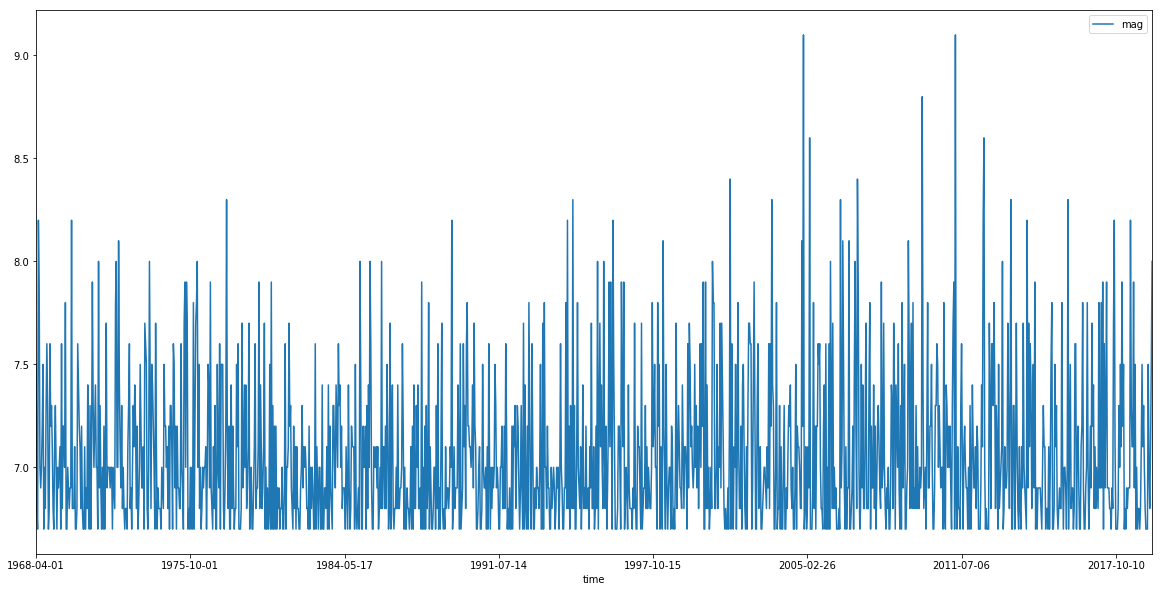

In [0]:
df_quakes.plot(x="time", y="mag", figsize=(20, 10));

In [13]:
df_quakes.shape

(23559, 10)

In [14]:
df_quakes.columns

Index(['time', 'mag', 'latitude', 'longitude', 'depth', 'magType', 'place',
       'type', 'locationSource', 'magSource'],
      dtype='object')

In [0]:
def get_next_trading_day(date_in):
  t1 = date_in
  dayz = 1
  while t1 not in df_gold.index:
    t1 = pd.to_datetime(date_in).date() + datetime.timedelta(days=dayz)
    t1 = t1.strftime('%Y-%m-%d')
    dayz += 1
  return t1

In [0]:
import datetime
i = -1
data = []
for _, row in df_quakes.iterrows():

  i += 1
  
  if row.time > "2019-04-15":
    continue
    
  t0 = get_next_trading_day(row.time)
  
  t1 = pd.to_datetime(row.time).date() + datetime.timedelta(days=7)
  t1 = t1.strftime('%Y-%m-%d')
  t1 = get_next_trading_day(t1)

  t2 = pd.to_datetime(row.time).date() + datetime.timedelta(days=14)
  t2 = t2.strftime('%Y-%m-%d')
  t2 = get_next_trading_day(t2)
  
  t3 = pd.to_datetime(row.time).date() + datetime.timedelta(days=30)
  t3 = t3.strftime('%Y-%m-%d')
  t3 = get_next_trading_day(t3)

  x = (row.time, row.mag, row.latitude, row.longitude, row.depth, row.magType, row.place,
       row.type, row.locationSource, row.magSource,
       df_gold.loc[t0].closing_price, df_gold.loc[t1].closing_price,
            df_gold.loc[t2].closing_price, df_gold.loc[t3].closing_price)

  data.append(x)

In [0]:
df_quake_gold = pd.DataFrame(data=data, columns=['Date', 'Mag', 'Lat', 'Long', 'Depth', 'magType',
                                                 'Place', 'Type', 'locationSource', 'magSource',
                                                 'Price_Day_0', 'Price_Day_7', 'Price_Day_14', 'Price_Day_30'])

In [18]:
df_quake_gold.head(15)

,Date,Mag,Lat,Long,Depth,magType,Place,Type,locationSource,magSource,Price_Day_0,Price_Day_7,Price_Day_14,Price_Day_30
0,1968-04-01,7.50,32.449000,132.269000,34.2,mw,"Shikoku, Japan",earthquake,iscgem,iscgem,37.70,37.05,38.00,39.20
1,1968-04-01,6.80,32.241000,132.136000,30.0,mw,"Shikoku, Japan",earthquake,iscgem,iscgem,37.70,37.05,38.00,39.20
2,1968-04-07,5.90,51.359000,176.550000,36.4,mw,"Rat Islands, Aleutian Islands, Alaska",earthquake,iscgem,iscgem,37.05,38.00,38.00,39.30
3,1968-04-09,6.60,33.179833,-116.103000,10.0,mw,"5km NNE of Ocotillo Wells, CA",earthquake,ci,ci,37.50,38.00,38.40,39.70
4,1968-04-14,5.60,33.514000,141.763000,24.2,mw,"off the east coast of Honshu, Japan",earthquake,iscgem,iscgem,38.00,38.00,38.75,39.80
5,1968-04-19,5.80,-42.680000,-16.088000,10.0,mw,southern Mid-Atlantic Ridge,earthquake,iscgem,iscgem,37.65,38.65,39.10,42.30
6,1968-04-20,6.30,-15.676000,-172.705000,15.0,mw,Samoa Islands region,earthquake,iscgem,iscgem,38.00,38.75,39.75,42.30
7,1968-04-21,6.30,38.621000,143.286000,25.0,mw,"off the east coast of Honshu, Japan",earthquake,iscgem,iscgem,38.00,38.75,39.75,42.40
8,1968-04-23,6.20,58.645000,-150.086000,20.1,mw,Gulf of Alaska,earthquake,iscgem,iscgem,38.40,39.10,39.30,41.40
9,1968-04-26,6.10,18.462000,-103.528000,30.0,mw,"Michoacan, Mexico",earthquake,iscgem,iscgem,38.65,39.10,39.60,41.50


In [0]:
df_quake_gold["Appr_Day_7"] = 100 * (df_quake_gold["Price_Day_7"] - df_quake_gold["Price_Day_0"]) / df_quake_gold["Price_Day_0"]
df_quake_gold["Appr_Day_14"] = 100 * (df_quake_gold["Price_Day_14"] - df_quake_gold["Price_Day_0"]) / df_quake_gold["Price_Day_0"]
df_quake_gold["Appr_Day_30"] = 100 * (df_quake_gold["Price_Day_30"] - df_quake_gold["Price_Day_0"]) / df_quake_gold["Price_Day_0"]

In [20]:
df_quake_gold.describe()

,Mag,Lat,Long,Depth,Price_Day_0,Price_Day_7,Price_Day_14,Price_Day_30,Appr_Day_7,Appr_Day_14,Appr_Day_30
count,23510.000000,23510.000000,23510.000000,23510.000000,23510.000000,23510.000000,23510.000000,23510.000000,23510.000000,23510.000000,23510.000000
mean,5.876575,1.127416,38.561768,71.115927,552.634036,553.258860,553.667117,555.282565,0.148572,0.311088,0.719122
std,0.421770,30.028188,125.734334,124.306169,438.303339,438.776486,438.769943,439.867788,2.606922,3.678986,5.585245
min,5.500000,-77.080000,-179.997000,-1.100000,34.750000,34.750000,34.750000,34.750000,-26.588235,-23.629191,-27.436282
25%,5.600000,-19.153250,-77.129250,13.000000,290.500000,291.000000,291.000000,291.525000,-1.109778,-1.575276,-2.189908
50%,5.700000,-3.949500,102.652000,33.000000,384.500000,384.250000,384.600000,384.775000,0.108440,0.156090,0.135399
75%,6.000000,24.461500,144.724250,53.700000,688.750000,688.700000,688.750000,716.137500,1.345029,1.981361,3.184713
max,9.100000,86.922900,179.998000,700.000000,1895.000000,1895.000000,1895.000000,1895.000000,28.787879,42.006803,80.275716


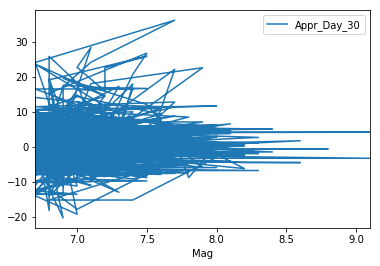

In [0]:
df_quake_gold.plot(x="Mag", y="Appr_Day_30")

In [0]:
# round quake mag to single digit prec
df_quake_gold['Mag'] = df_quake_gold['Mag'].apply(lambda x: round(x, 1))

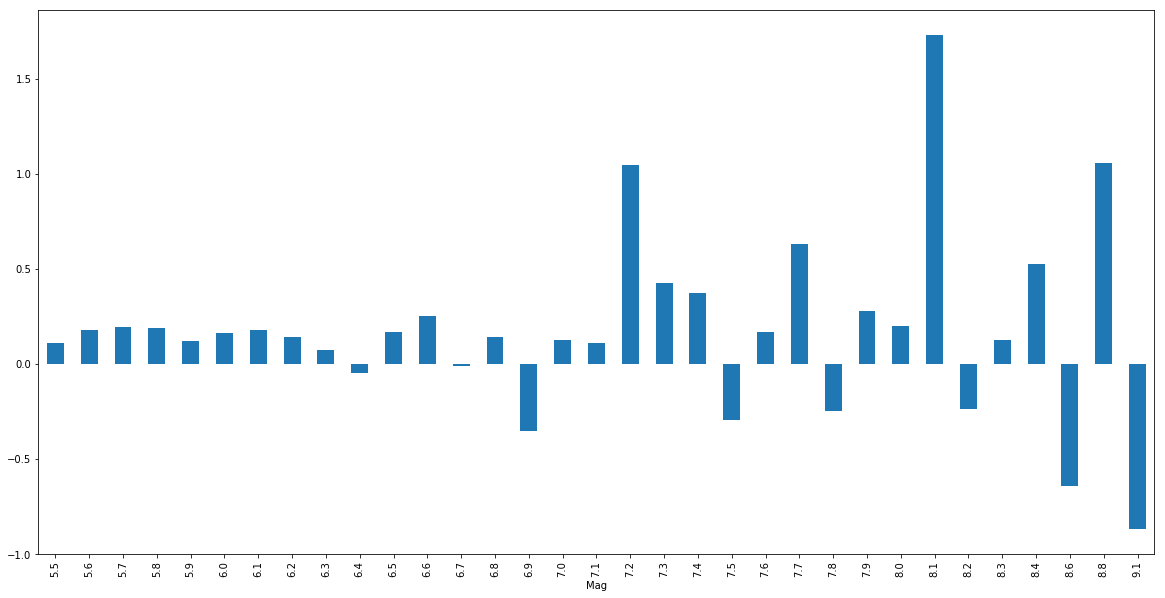

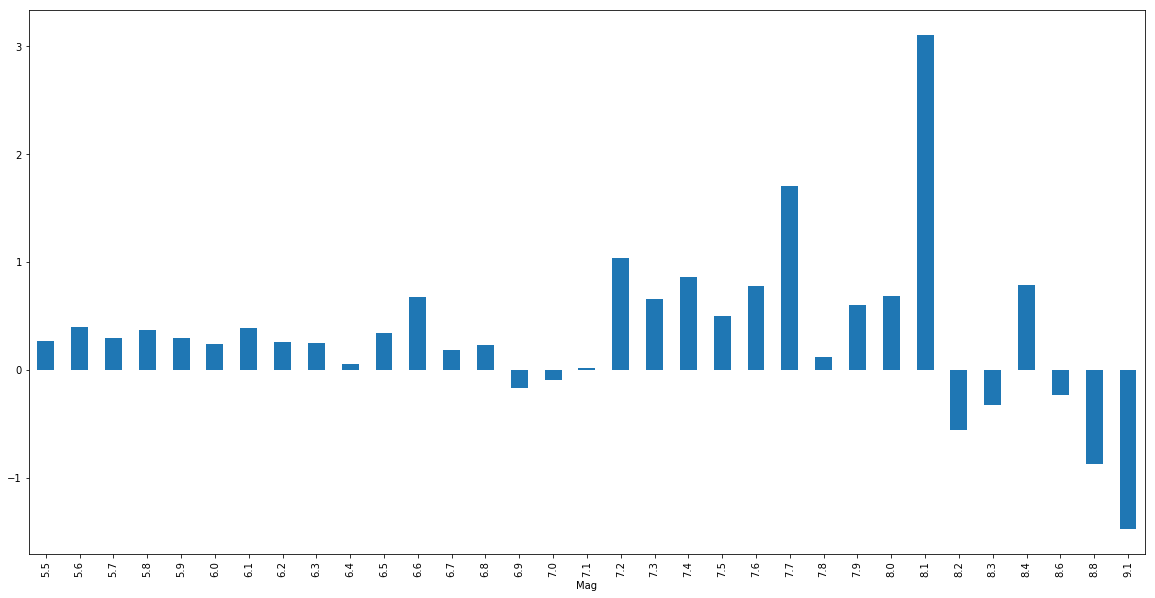

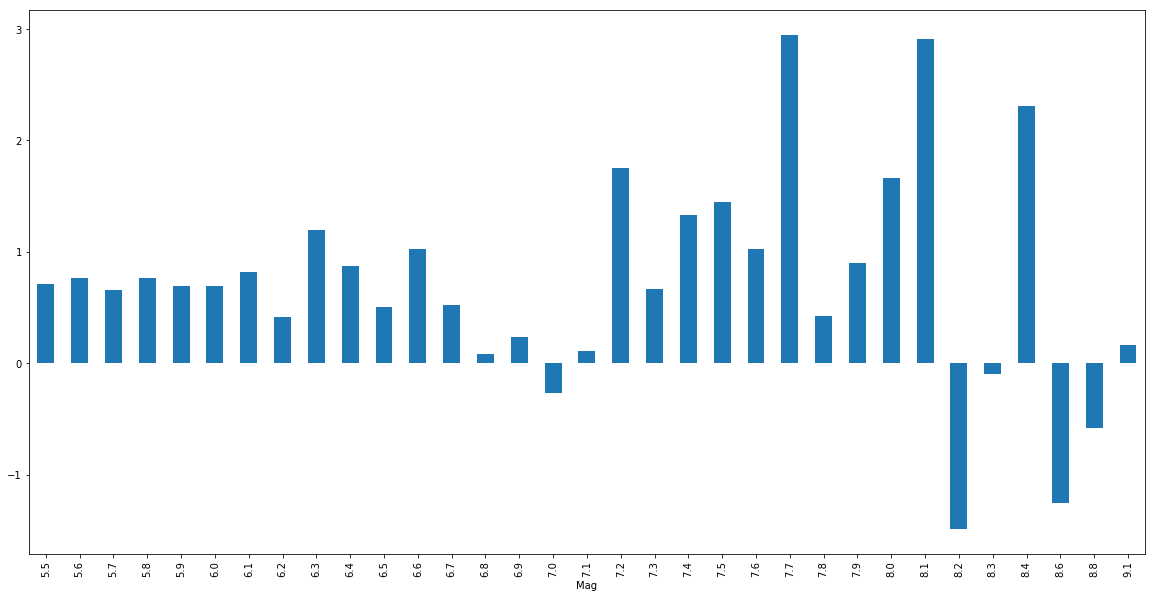

In [23]:
import matplotlib.pyplot as plt
for i in ['Appr_Day_7', 'Appr_Day_14', 'Appr_Day_30']:
  df = df_quake_gold.groupby(['Mag'])[i].mean()
  df.plot.bar(figsize=(20, 10))
  plt.show()

In [0]:
#DATA_DIR = "/Users/wel51x/GDrive/Lambda/LambdaLabs/quake-viewer/ds-data/"
DATA_DIR = ""

data = pd.Series(df_quake_gold.Mag.value_counts().sort_index())
df_quake_gold_counts = pd.DataFrame(columns=['Mag', 'Ct'], index=[0])
df_quake_gold_counts = pd.concat([df_quake_gold_counts, data.to_frame()], ignore_index=True, sort=True)
df_quake_gold_counts = df_quake_gold_counts.iloc[1:]
df_quake_gold_counts.Ct = data.index
df_quake_gold_counts.columns = ['Mag', 'Count']

In [30]:
df_quake_gold_counts.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
Mag,5.5,5.6,5.7,5.8,5.9,6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8,8.1,8.2,8.3,8.4,8.6,8.8,9.1
Count,4904,4000,3077,2346,1946,1557,1192,882,765,571,461,364,299,231,191,161,124,97,64,53,47,47,38,29,23,13,6,9,6,2,2,1,2


In [0]:
df_quake_gold.to_csv(DATA_DIR + "Gold Price Change by Earthquake(5.5+).csv")
df_quake_gold_counts.to_csv(DATA_DIR + "gold_counts(5.5+).csv")